In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

!wget $data -O data-week-3.csv


--2021-09-26 19:29:20--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: 'data-week-3.csv'

     0K .......... .......... .......... .......... ..........  5%  624K 1s
    50K .......... .......... .......... .......... .......... 10% 1.42M 1s
   100K .......... .......... .......... .......... .......... 15% 1.05M 1s
   150K .......... .......... .......... .......... .......... 20% 3.20M 1s
   200K .......... .......... .......... .......... .......... 26% 2.67M 1s
   250K .......... .......... .......... .......... .......... 31% 1.75M 0s
   300K .......... .......... .......... ....

In [19]:

df = pd.read_csv('data-week-3.csv')

# transpose the data frame
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<H2> DATA PREPARATION</H2>

In [20]:
df.columns = df.columns.str.lower().str.replace(" ","_")

categorical_columns = list(df.dtypes[df.dtypes== 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(" ","_")

In [21]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [22]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [23]:
tc = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [24]:
df.totalcharges = df.totalcharges.fillna(0)

In [25]:
df.churn # transform yes,no to 0 and 1 respectively

df.churn = (df.churn == 'yes').astype(int)


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
df_full_train , df_test =train_test_split(df,test_size=0.2,random_state=1) # Using 20% test Size


In [28]:
len(df_full_train),len(df_test)

(5634, 1409)

In [29]:
# validation data set of full train 
# 20/80 = 1/4 = 25% of full train data set

df_train , df_val = train_test_split(df_full_train,test_size=0.25,random_state=1) # Using 20% test Size


In [30]:
len(df_train) , len(df_val) , len (df_test) # refer to img 1

(4225, 1409, 1409)

In [31]:
df_train= df_train.reset_index(drop=True) # not necessary for models to work
df_val = df_val.reset_index(drop=True) # not necessary for models to work
df_test = df_test.reset_index(drop=True) # not necessary for models to work

In [32]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [33]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

# TODO check why df_full_train's churn wasn't deleted. 

In [34]:
y_val

array([0, 0, 0, ..., 0, 1, 1])

<h1> 3.4 EDA
</h1>

<li>Check missing values
 </li>
<li>Look at the target variable (churn)
 </li>
<li>Look at numerical and categorical variables
 </li>

In [35]:
df_full_train = df_full_train.reset_index(drop=True)

In [36]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [37]:
df_full_train.churn.value_counts(normalize=True) # counts ammount of churns and checks porcentage with normalize
# CHURN RATE -> YES = 0.27 %

0    0.730032
1    0.269968
Name: churn, dtype: float64

In [38]:
df_full_train.churn.mean()

0.26996805111821087

In [39]:
df_full_train.churn.value_counts()

0    4113
1    1521
Name: churn, dtype: int64

In [40]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate,2)

0.27

In [41]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int32
dtype: object

In [42]:
# 3 numerical variables
# tenure , monthly charges , total charges 

numerical = ['tenure','monthlycharges','totalcharges']
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [43]:
categorical = [    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]


In [44]:
df_full_train[categorical].nunique() # most of them are binary

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

In [45]:
df_full_train.head()


,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [46]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

0.27682403433476394

In [47]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

0.2632135306553911

In [48]:
global_churn = df_full_train.churn.mean()
global_churn

0.26996805111821087

In [49]:
df_full_train.partner.value_counts()

no     2932
yes    2702
Name: partner, dtype: int64

In [50]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner # 5% less than the global rate

0.20503330866025166

In [51]:
churn_partner_no = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_partner_no # 10% more than the global rate

0.3298090040927694

In [52]:
global_churn - churn_partner

0.06493474245795922

In [53]:
global_churn - churn_partner_no

-0.05984095297455855

In [54]:
# gender doesn't really matter , but the existence of a partner does change the result of churns

In [55]:
churn_partner_no / global_churn # Number that's higher than 1, people without a partner are more likely to churn



1.2216593879412643

In [56]:
churn_partner/ global_churn

0.7594724924338315

$$ RISK = \frac{GROUP}{GLOBAL} $$
 <li> > 1 More likely to Chrun </li>
 <li> < 1 less likely to Chrun </li>

SQL code to translate to python:
~~~~sql
SELECT
    gender,
    AVG(churn),
    AVG(churn) - global_churn AS diff,
    AVG(churn) / global_churn AS risk
FROM 
    data
GROUP by
    gender;
~~~~



In [57]:
df_group = df_full_train.groupby('gender').churn.agg(['mean','count'])
df_group['diff'] = df_group['mean'] - global_churn  # ADDING COLUMNS
df_group['risk'] = df_group['mean'] / global_churn # ADDING COLUMNS
df_group

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


In [58]:
# for each column in categorical do this agregation
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean','count'])
    df_group['diff'] = df_group['mean'] - global_churn  # ADDING COLUMNS
    df_group['risk'] = df_group['mean'] / global_churn # ADDING COLUMNS
    display(df_group)
    



gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208


partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472


dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651


phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412


multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948


internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201


onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570


onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660


deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480


techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390


streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328


streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182


contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730


paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560


paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


<h1> 3.6 Feature Importance - Mutual information</h1>

Mutual information - concept from information theory, it tells us how much we can learn about one variable if we know the value of another



In [59]:
from sklearn.metrics import mutual_info_score

In [60]:
mutual_info_score(df_full_train.churn,df_full_train.contract) # mutual information score

0.0983203874041556

In [61]:
mutual_info_score(df_full_train.totalcharges,df_full_train.churn) # mutual information score

C:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


0.5479545160406455

In [62]:
def mutual_info_churn_score(series):
    return mutual_info_score(series,df_full_train.churn)

In [63]:
df_full_train[categorical].apply(mutual_info_churn_score)

gender              0.000117
seniorcitizen       0.009410
partner             0.009968
dependents          0.012346
phoneservice        0.000229
multiplelines       0.000857
internetservice     0.055868
onlinesecurity      0.063085
onlinebackup        0.046923
deviceprotection    0.043453
techsupport         0.061032
streamingtv         0.031853
streamingmovies     0.031581
contract            0.098320
paperlessbilling    0.017589
paymentmethod       0.043210
dtype: float64

In [64]:
#SORT BY ASC

mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

<h1> ML Zoomcamp 3.7 - Feature Importance: Correlation </h1>


In [65]:
df_full_train.tenure.max(

)

72

In [66]:
df_full_train[numerical]

,tenure,monthlycharges,totalcharges
0,12,19.70,258.35
1,42,73.90,3160.55
2,71,65.15,4681.75
3,71,85.45,6300.85
4,30,70.40,2044.75
...,...,...,...
5629,9,100.50,918.60
5630,60,19.95,1189.90
5631,28,105.70,2979.50
5632,2,54.40,114.10


In [67]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [68]:
df_full_train[df_full_train.tenure <= 2].churn.mean() # the churn rate is HIGH for 2 months
df_full_train[df_full_train.tenure > 2].churn.mean() # the churn rate is HIGH for 2 months

0.22478269658378816

In [69]:
df_full_train[ (df_full_train.tenure > 2) & (df_full_train.tenure <= 12) ].churn.mean()


0.3994413407821229

In [70]:
df_full_train[ (df_full_train.monthlycharges > 50) ].churn.mean()


0.32499341585462205

<h1> <i> ML Zoomcamp 3.8 - One-Hot Encoding </i> </h1>


<li> Scikit-Learn

In [71]:
from sklearn.feature_extraction import DictVectorizer

In [72]:
train_dicts= df_train[categorical + numerical ].to_dict(orient='records') # creating a dictionary from the data

In [73]:
dv = DictVectorizer(sparse=False) # turn the dictionary into a vector

In [74]:
X_train = dv.fit_transform(train_dicts) # building a one-hot enconding matrix out of the data

In [75]:
X_train.shape # USE TO CHECK DATA SETS

(4225, 45)

In [76]:
dv.fit(train_dicts) # SAME as above
X_train = dv.transform(train_dicts)

In [77]:
X_train.shape

(4225, 45)

In [78]:
dv.fit(train_dicts)

DictVectorizer(sparse=False)

In [141]:
# dv.get_feature_names()
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)


In [123]:
list(dv.transform(train_dicts[:5])[0]) # SPARSE MATRIX ( A LOT OF ZEROES )


[0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 115.5,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 72.0,
 8425.15]

<h1> ML Zoomcamp 3.9 - Logistic Regression
</h1>

<html>
  <head>
    <link rel="stylesheet"
	  href="https://maxcdn.bootstrapcdn.com/bootstrap/4.0.0/css/bootstrap.min.css"
	  integrity="sha384-Gn5384xqQ1aoWXA+058RXPxPg6fy4IWvTNh0E263XmFcJlSAwiGgFAW/dAiS6JXm"
	  crossorigin="anonymous">
  </head>


<h4> USING THE SIGMOID </h4>

$$ g(x_i) = \sigma ( W_o + W^{T}x_{i}) $$

$$Values from (- \infty ,\infty)$$

With sigmoid

$$Values from (0,1) \\$$
$$g(x_i) -> 0-1$$ 
is the probability of $x_i$ belonging to the positive class.




$$\sigma = \frac{1}{1+exp(-z)}$$

In [124]:
def sigmoid(z):
    return 1 / (1+ np.exp(-z))

In [125]:
z= np.linspace(-5,5,51) # numbers between -5 to 5 with 51 numbers between the interval

In [126]:
sigmoid(z)

array([0.00669285, 0.00816257, 0.0099518 , 0.01212843, 0.01477403,
       0.01798621, 0.02188127, 0.02659699, 0.03229546, 0.03916572,
       0.04742587, 0.05732418, 0.06913842, 0.0831727 , 0.09975049,
       0.11920292, 0.14185106, 0.16798161, 0.19781611, 0.23147522,
       0.26894142, 0.31002552, 0.35434369, 0.40131234, 0.450166  ,
       0.5       , 0.549834  , 0.59868766, 0.64565631, 0.68997448,
       0.73105858, 0.76852478, 0.80218389, 0.83201839, 0.85814894,
       0.88079708, 0.90024951, 0.9168273 , 0.93086158, 0.94267582,
       0.95257413, 0.96083428, 0.96770454, 0.97340301, 0.97811873,
       0.98201379, 0.98522597, 0.98787157, 0.9900482 , 0.99183743,
       0.99330715])

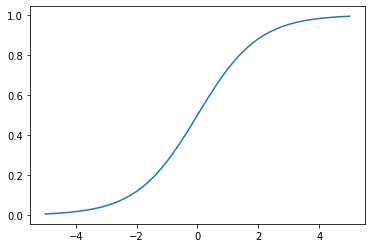

In [127]:
plt.plot(z,sigmoid(z)) # covert the score to a probability with the sigmoid function

In [128]:
def linear_regression(xi):
    result = w0 
    for j in range(len(w)):
        result = result + xi[j] * w[j]
    return result 

In [86]:
def logistic_regression(xi):
    score = w0 
    for j in range(len(w)):
        result = result + xi[j] * w[j]
    result = sigmoid(score)
    return result 
# LINEAR MODELS , both use dot product ( linear operator )

<h2> Training logic regression with Scikit-Learn </h2>

In [130]:
from sklearn.linear_model import LogisticRegression

In [142]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [143]:
model.coef_[0].round(2) # these are the Weights 

array([ 0.47, -0.17, -0.41, -0.03, -0.08,  0.06, -0.09, -0.08, -0.03,
       -0.07, -0.34,  0.32, -0.09,  0.  , -0.26,  0.14,  0.01,  0.06,
       -0.09, -0.08,  0.27, -0.09, -0.28, -0.23,  0.12, -0.17,  0.06,
       -0.09, -0.03,  0.07, -0.06,  0.14, -0.25,  0.22, -0.12, -0.09,
        0.1 , -0.07, -0.09,  0.05,  0.21, -0.09, -0.23, -0.07,  0.  ])

In [144]:
model.intercept_[0] #bayes elements

-0.10903368558973384

In [145]:
model.predict(X_train
) # HARD predictions 

array([0, 1, 1, ..., 1, 0, 1])

In [146]:
model.predict_proba(X_train
)[:,1]# SOFT predictions (1)

# PROBABILITY
# 0 ------- 1
#           probability of churning

array([0.09548427, 0.67933209, 0.63368112, ..., 0.53163422, 0.04254311,
       0.69873023])

In [147]:
y_pred =model.predict_proba(X_val
)[:,1]# SOFT predictions (1)

In [148]:
churn_decision= y_pred >= 0.5 # TRUE means the customer is churning

In [149]:
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 311, dtype: object

Acuraccy to test how many correct predictions are made.

In [150]:
y_val

array([0, 0, 0, ..., 0, 1, 1])

In [151]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

In [152]:
(y_val == churn_decision).mean()

0.8034066713981547

In [99]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [100]:
df_pred

,probability,prediction,actual
0,0.008997,0,0
1,0.204526,0,0
2,0.212224,0,0
3,0.543051,1,1
4,0.213786,0,0
...,...,...,...
1404,0.313675,0,0
1405,0.039360,0,1
1406,0.136394,0,0
1407,0.799772,1,1


In [101]:
df_pred['correct'] = df_pred.prediction == df_pred.actual
df_pred

,probability,prediction,actual,correct
0,0.008997,0,0,True
1,0.204526,0,0,True
2,0.212224,0,0,True
3,0.543051,1,1,True
4,0.213786,0,0,True
...,...,...,...,...
1404,0.313675,0,0,True
1405,0.039360,0,1,False
1406,0.136394,0,0,True
1407,0.799772,1,1,True


In [102]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df_pred [( df_pred['correct'].astype(str).str.contains('False') ) & (  df_pred.probability <= 0.01 ) ])

     probability  prediction  actual  correct
913     0.009233           0       1    False


In [103]:
df_pred.correct.mean() # conversion to int happens auto

0.8034066713981547

In [104]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

<h1> Model Interpretation </h1>

<li> Look at the coefficients </li>
<li> Train a smaller model with fewer features </li>

In [105]:
dv.get_feature_names_out()

AttributeError: 'DictVectorizer' object has no attribute 'get_feature_names_out'

In [ ]:
dict(zip( dv.get_feature_names_out(), model.coef_[0].round(3))) # CHECK WEIGHTS FOR EACH FEATURE 

In [ ]:
#Training a smaller model

small = ['contract','tenure','monthlycharges']

df_train[small].iloc[:10].to_dict(orient='records')

In [ ]:
dicts_train_small = df_train[small].to_dict(orient='records')

dicts_val_small = df_val[small].to_dict(orient='records')

In [ ]:
dv_small= DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

In [ ]:
dv_small.get_feature_names_out()

In [ ]:
X_train_small = dv_small.transform(dicts_train_small)

Training the model logistic regression

In [ ]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

In [ ]:
w0 = model_small.intercept_[0]
w0

In [ ]:
w = model_small.coef_[0]
w.round(3)

In [ ]:
dict(zip( dv_small.get_feature_names_out(), w.round(3))) # CHECK WEIGHTS FOR EACH FEATURE 

$$ -2.47 + 0.97 + 50*0.027 + 5*(-0.036) = -0.33$$



In [ ]:
sigmoid(-2.47 + 0.97 + 50*0.027 + 5*(-0.036) ) # increasing the probability

In [ ]:
-2.47 + 0.97 + 50*0.027 + 5*(-0.036)

In [ ]:
sigmoid(_)

<h1> ML Zoomcamp 3.12 - Using the Model </h1>


In [ ]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [ ]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)
y_full_train = df_full_train.churn.values

In [ ]:
model= LogisticRegression().fit(X_full_train,y_full_train)

In [ ]:
dicts_test = df_test[categorical + numerical ].to_dict(orient='records')

In [ ]:
X_test = dv.transform(dicts_test)

In [ ]:
y_pred = model.predict_proba(X_test)[:,1]

In [ ]:
churn_decision = (y_pred >= 0.5)

In [ ]:
(churn_decision == y_test ).mean()

In [ ]:
customer = dicts_test[-1]
customer

In [ ]:
X_small = dv.transform(customer)

In [ ]:
X_small.shape
# 1 CUSTOMER 45 FEATURES

In [ ]:
model.predict_proba(X_small)[0,1] # 40% probability of churning

In [ ]:
y_test[-1]